# Framing the Problem and Data

In order to get a good idea about how we should get donors for DonorChoose.org re-engaged, we should get a better understanding of the data

In [17]:
library(data.table)
library(ggplot2)
library(scales)
library(repr)
options(repr.plot.width=10, repr.plot.height=3)

In [8]:
Donations <- fread('data/Donations.csv')

Read 4687884 rows and 7 (of 7) columns from 0.569 GB file in 00:00:10


In [2]:
Donors <- fread('data/Donors.csv')
Projects <- fread('data/Projects.csv')
Resources <- fread('data/Resources.csv')
Schools <- fread('data/Schools.csv')
Teachers <- fread('data/Teachers.csv')

Read 4687884 rows and 7 (of 7) columns from 0.569 GB file in 00:00:36


Warning message in fread("data/Donors.csv"):
"Bumped column 5 to type character on data row 28151, field contains 'N2J'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE."

Read 1208651 rows and 15 (of 15) columns from 2.237 GB file in 00:01:18
Read 7210448 rows and 5 (of 5) columns from 0.763 GB file in 00:00:15


In [3]:
head(Donors)
head(Schools)

Donor ID                         Donor City   Donor State Donor Is Teacher
1 00000ce845c00cbf0686c992fc369df4 Evanston     Illinois    No              
2 00002783bc5d108510f3f9666c8b1edd Appomattox   other       No              
3 00002d44003ed46b066607c5455a999a Winton       California  Yes             
4 00002eb25d60a09c318efbd0797bffb5 Indianapolis Indiana     No              
5 0000300773fe015f870914b42528541b Paterson     New Jersey  No              
6 00004c31ce07c22148ee37acd0f814b9              other       No              
  Donor Zip
1 602      
2 245      
3 953      
4 462      
5 75       
6

School ID                        School Name                           
1 00003e0fdd601b8ea0a6eb44057b9c5e Capon Bridge Middle School            
2 00004e32a448b4832e1b993500bf0731 The Woodlands College Park High School
3 0002021bb799f28de224f1acc1ff08c4 Samantha Smith Elementary School      
4 0004604f675212a8cac1161338265196 Kingsbury Country Day School          
5 0004c9d50bcf0cea990f844e58b5e2c3 Redwater Elementary School            
6 0004ffe3558fd70d939ad522b92447c8 Math & Science Success Academy        
  School Metro Type School Percentage Free Lunch School State  School Zip
1 rural             56                           West Virginia 26711     
2 urban             41                           Texas         77384     
3 suburban           2                           Washington    98074     
4 unknown           76                           Michigan      48370     
5 rural             50                           Texas         75573     
6 unknown           63                           Arizona       85706     
  School City   School County School District             
1 Capon Bridge  Hampshire     Hampshire Co School District
2 The Woodlands Montgomery    Conroe Ind School District  
3 Sammamish     King          Lake Washington Sch Dist 414
4 Oxford        Oakland       Michigan Dept Of Education  
5 Redwater      Bowie         Redwater Ind Sch District   
6 Tucson        Pima          Arizona Dept Of Education

## Donations

Perhaps the most important information is the 'Donations' information. After all, this is how the money is made! Let's take a look.

In [4]:
head(Donations)

Project ID                       Donation ID                     
1 000009891526c0ade7180f8423792063 688729120858666221208529ee3fc18e
2 000009891526c0ade7180f8423792063 dcf1071da3aa3561f91ac689d1f73dee
3 000009891526c0ade7180f8423792063 18a234b9d1e538c431761d521ea7799d
4 000009891526c0ade7180f8423792063 38d2744bf9138b0b57ed581c76c0e2da
5 000009891526c0ade7180f8423792063 5a032791e31167a70206bfb86fb60035
6 000009891526c0ade7180f8423792063 8cea27f0cc03f41f66aab96b284ae6a1
  Donor ID                         Donation Included Optional Donation
1 1f4b5b6e68445c6c4a0509b3aca93f38 No                                 
2 4aaab6d244bf3599682239ed5591af8a Yes                                
3 0b0765dc9c759adc48a07688ba25e94e Yes                                
4 377944ad61f72d800b25ec1862aec363 Yes                                
5 6d5b22d39e68c656071a842732c63a0c Yes                                
6 896c75c9b8d9a91c759746e566cd3f37 Yes                                
  Donation Amount Donor Cart Sequence Donation Received Date
1 178.37          11                  2016-08-23 13:15:57   
2  25.00           2                  2016-06-06 20:05:23   
3  20.00           3                  2016-06-06 14:08:46   
4  25.00           1                  2016-05-15 10:23:04   
5  25.00           2                  2016-05-17 01:23:38   
6  15.00           1                  2016-06-04 17:58:55

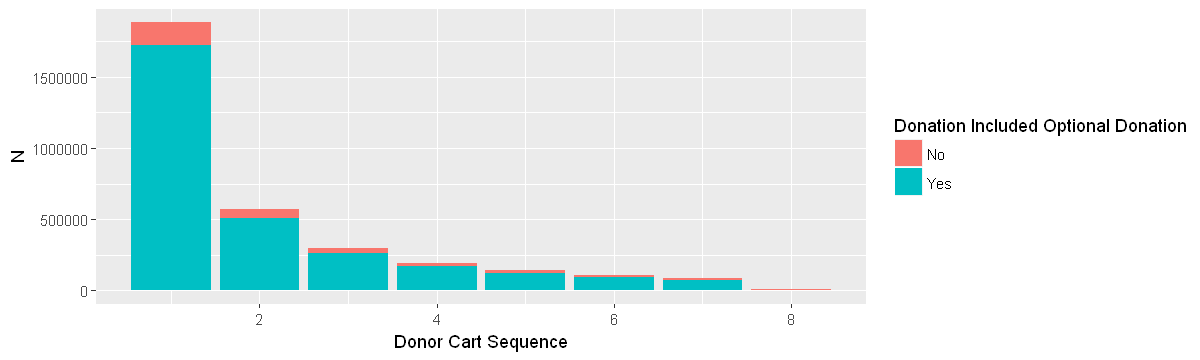

In [55]:
# By_Cart_Sequence = Donations[,.(.N,`Optional Donation` = sum(`Donation Included Optional Donation`=='Yes')),keyby = `Donor Cart Sequence`]

ggplot(By_Cart_Sequence[1:15], aes(x=`Donor Cart Sequence`, y =N))+
    geom_bar(stat = 'identity', aes(fill = `Donation Included Optional Donation`))


In [9]:
# Visualizing Donations over time
Donations[, `Donation Received Date` := anytime::anydate(`Donation Received Date`)]
Donations[, Year := format(`Donation Received Date`, '%Y')]
Donation_by_day <- Donations[,.(Total_Donations = sum(`Donation Amount`)), by = `Donation Received Date`]
Donation_by_day[, Year := format(`Donation Received Date`, '%Y')]

In [11]:
Donations[,.(`Donation Amount` = sum( `Donation Amount`)), by =Year]

Year Donation Amount
1 2016 62652231.24    
2 2013 30428220.80    
3 2017 72872130.78    
4 2018 26481196.48    
5 2014 41461266.85    
6 2015 50488354.49    
7 2012    24842.64

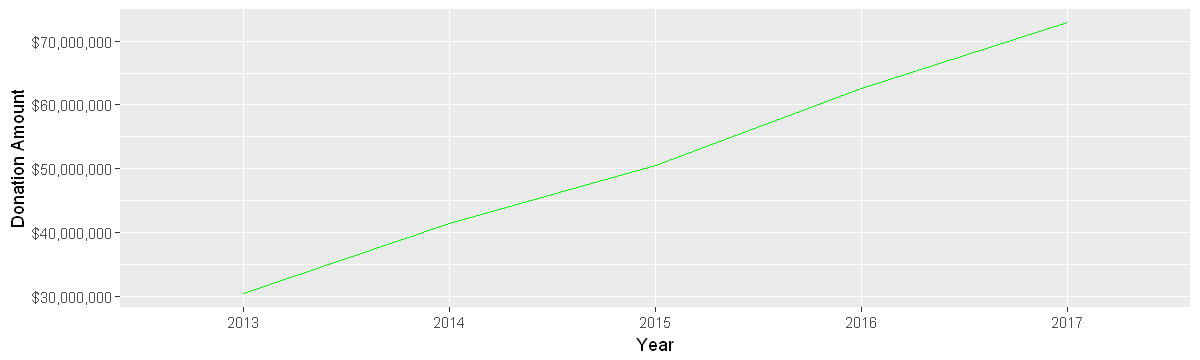

In [23]:
ggplot(Donations[Year!=2018 & Year!=2012,.(`Donation Amount` = sum( `Donation Amount`)), by =Year], aes(Year, `Donation Amount`)) +
    geom_line(aes(group = 1), color = 'green') +
    scale_y_continuous(labels=dollar_format())

In [6]:
print(paste0('Ratio of unique projects per donation: ' ,round(length(unique(Donations$`Project ID`)) / nrow(Donations),4)))
# length(unique(Donations$`Donation ID`)) / nrow(Donations)
print(paste0('Ratio of unique donors per donation: ', round(length(unique(Donations$`Donor ID`)) / nrow(Donations),4)))

[1] "Ratio of unique projects per donation: 0.1924"
[1] "Ratio of unique donors per donation: 0.4319"


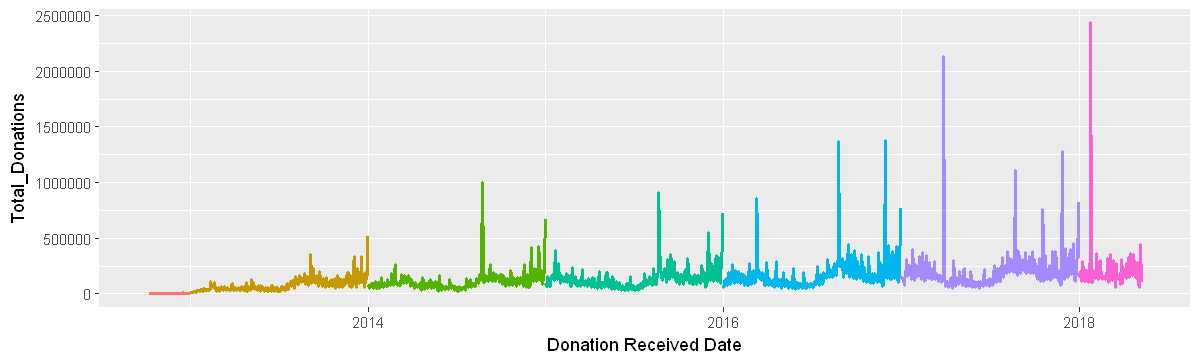

In [19]:
ggplot(Donation_by_day, aes(`Donation Received Date`, Total_Donations)) +
  geom_line(size = 1, aes(color = Year)) +
  theme(legend.position="none")

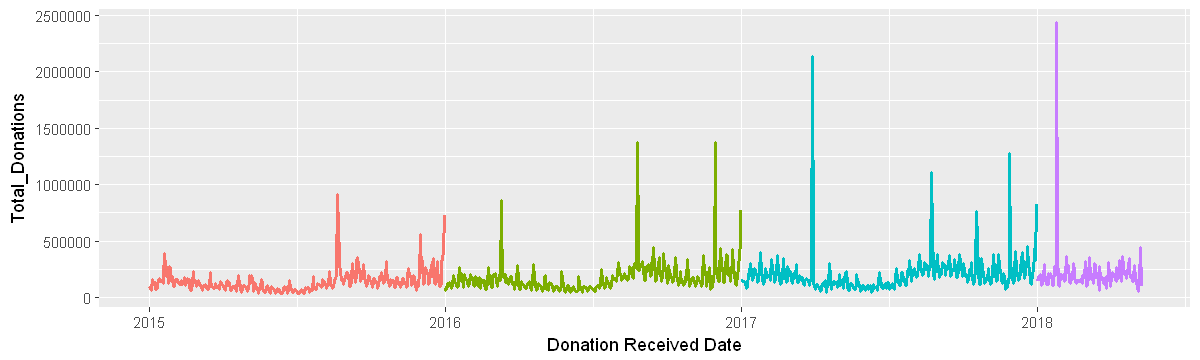

In [8]:
ggplot(Donation_by_day[`Year` >= 2015], aes(`Donation Received Date`, Total_Donations)) +
  geom_line(size = 1, aes(color = Year)) +
  theme(legend.position="none")

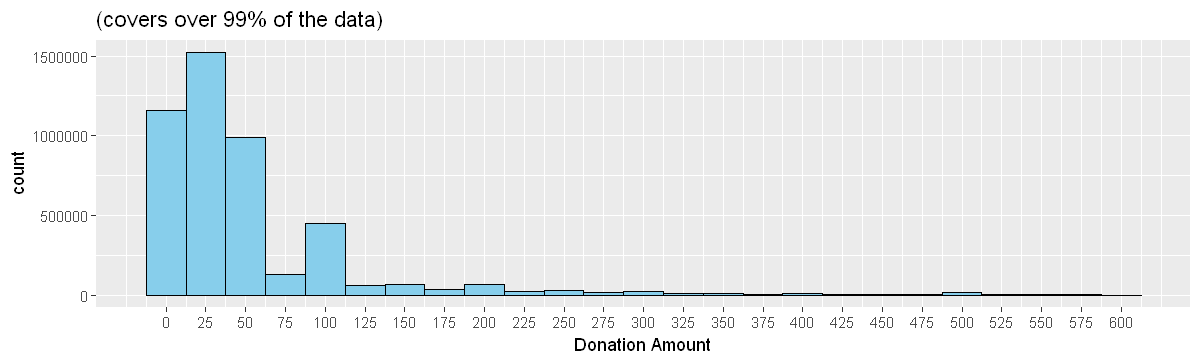

In [9]:
# nrow(Donations[`Donation Amount` < 600]) / nrow(Donations)

ggplot(Donations[`Donation Amount` < 600], aes(`Donation Amount`)) +
  geom_histogram(binwidth = 25, fill = 'skyblue', color = 'black') +
  scale_x_continuous(breaks = seq(0, 600, by = 25)) +
  labs(title = '(covers over 99% of the data)')

Now that we have an idea of the distribution of donations over time and amount, let's take a look the repeat donations

In [10]:
Repeated_Donors <- Donations[,.(`Times Donated`=.N, `Dollar Amount` = sum(`Donation Amount`)),by=`Donor ID`]

In [11]:
head(Repeated_Donors[order(-`Dollar Amount`)], 10)

Donor ID                         Times Donated Dollar Amount
1  a0e1d358aa17745ff3d3f4e4909356f3 10515         1879625.0    
2  2144d56b1947ebb26a19e7f1d07c970a  2152         1243529.7    
3  96c4f21513cd8962acb147ab384e6434  2148         1130565.6    
4  3ba8a29e3dd72043f9738c0895733834  1553          977614.5    
5  f9dd79ea006fee7bb4a5cc8473d8656c  1891          897408.3    
6  d006be7223c048ae8b2bdedd7dd2b4db  3330          766000.7    
7  bd58ba0b74427b6686b3d721f0cbcb6e  1126          695461.9    
8  5f521d214a6297fe87b60f921bba51ab   669          569512.5    
9  f4e59466422bf084792071a849284771  1580          463820.9    
10 7f90cc03b021484df72d3fa18e42a151   327          336489.3

In [12]:
Repeated_Donors  <- Repeated_Donors[,.(`Number of People` = .N, `Dollar Worth` = sum(`Dollar Amount`)),  by = `Times Donated`]
Repeated_Donors[,`Dollar Per Individual` := `Dollar Worth`/`Number of People`]

In [13]:
head(Repeated_Donors[order(`Times Donated`)])

Times Donated Number of People Dollar Worth Dollar Per Individual
1 1             1471613          78595864      53.40797            
2 2              274902          33947995     123.49126            
3 3               99063          19574818     197.59969            
4 4               49911          13510249     270.68681            
5 5               30578          10300913     336.87333            
6 6               19665           8077697     410.76518

In [14]:
(123.49126- 53.40797) * 1471613
.2*53.40797*1471613

[1] 103135481

[1] 15719173

By using 'Dollar Per Individual' averages as an extremely rough benchmark, moving the 'Times Donated = 1' group into the 'Times Donated = 2' would net an additional 103 million dollars. Of course, this is not a scientific estimate given the unknown variations between those in the 'Times Donated = 1' group and the 'Times Donated = 2' group, but it goes to show how important re-engagement is.

If we get at least 20% of those who donated only once to make another donation with the same average donation, then we can get another 15 million dollars in revenue. 

In [15]:
print(paste0('The ratio of those who only donated once: ',Repeated_Donors[`Times Donated` == 1,`Number of People`]/Repeated_Donors[,sum(`Number of People`)]))
print(paste0('The dollar ratio of those who only donated once: ',Repeated_Donors[`Times Donated` == 1,`Dollar Worth`]/Repeated_Donors[,sum(`Dollar Worth`)]))
print('This means those who donated more than once (approx 28%) are responsible for around 73% of total revenue')

[1] "The ratio of those who only donated once: 0.726882562776789"
[1] "The dollar ratio of those who only donated once: 0.276348754183691"
[1] "This means those who donated more than once (approx 28%) are responsible for around 73% of total revenue"


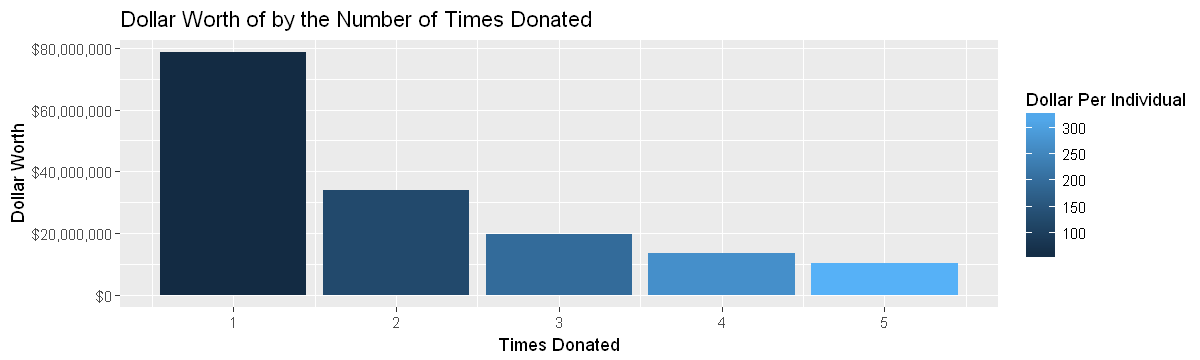

In [16]:
ggplot(Repeated_Donors[`Times Donated` <= 5], aes(x=`Times Donated`, y = `Dollar Worth`)) +
    geom_bar(stat = 'identity', aes(fill = `Dollar Per Individual`)) +
    scale_y_continuous(labels=dollar_format(prefix="$")) +
    scale_x_continuous(breaks = seq(0, 5, by = 1)) +
    labs(title = 'Dollar Worth of by the Number of Times Donated')

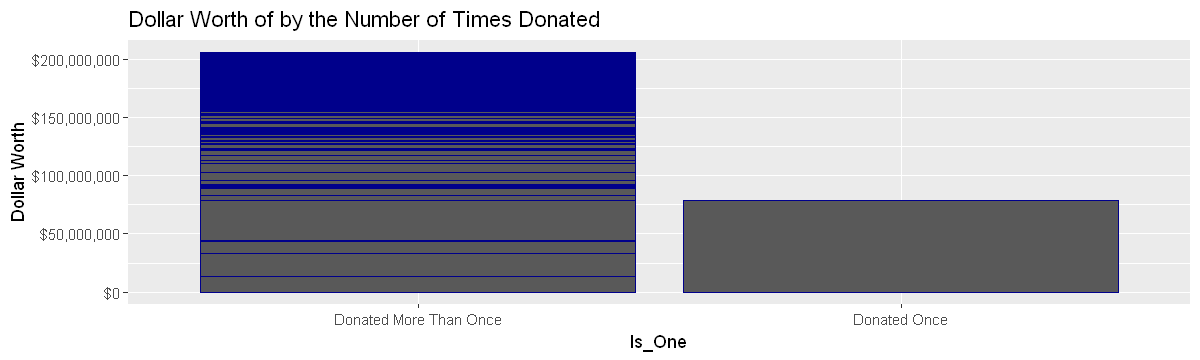

In [17]:
Repeated_Donors[,Is_One := ifelse(`Times Donated`== 1,'Donated Once','Donated More Than Once')]

ggplot(Repeated_Donors, aes(x=`Is_One`, y = `Dollar Worth`)) +
    geom_bar(stat = 'identity', color = 'darkblue') +
    scale_y_continuous(labels=dollar_format(prefix="$")) +
    labs(title = 'Dollar Worth of by the Number of Times Donated')

## Teachers
This dataframe does not contain a large amount of infomormation, but gender and first posted date may come in handy later.

In [18]:
head(Teachers)

Teacher ID                       Teacher Prefix
1 00000f7264c27ba6fea0c837ed6aa0aa Mrs.          
2 00002d44003ed46b066607c5455a999a Mrs.          
3 00006084c3d92d904a22e0a70f5c119a Mr.           
4 0000a9af8b6b9cc9e41f53322a8b8cf1 Ms.           
5 0000d4777d14b33a1406dd6c9019fe89 Ms.           
6 0000fc11407901bcacdfad1db909b9f6 Mrs.          
  Teacher First Project Posted Date
1 2013-08-21                       
2 2016-10-23                       
3 2016-09-08                       
4 2015-10-25                       
5 2017-02-10                       
6 2015-06-22

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

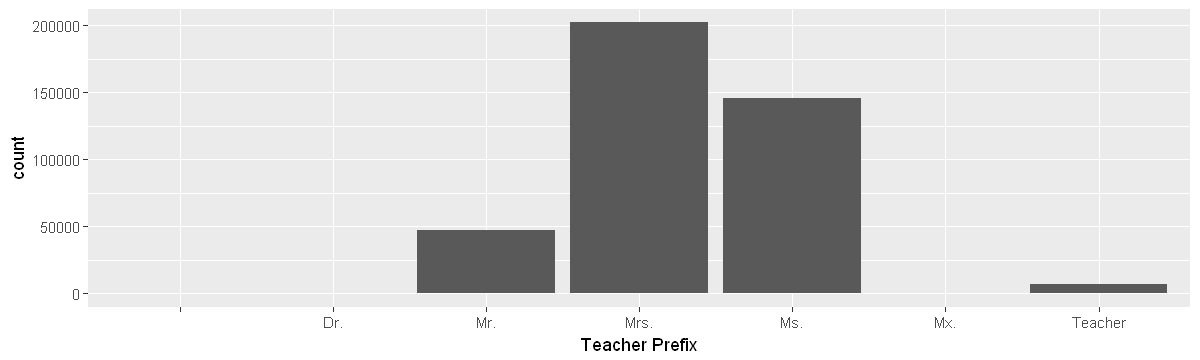

In [19]:
ggplot(Teachers,aes(`Teacher Prefix`))+
    geom_histogram(stat='count')

In [20]:
Males = Teachers[,sum(`Teacher Prefix`=='Mr.')]
Females = Teachers[,sum(`Teacher Prefix`=='Mrs.')]

If we consider all Mrs./Ms. to be female and all Mr. to be male, we can find out the gender distribution.

In [21]:
Males
Females
Females/Males

[1] 47480

[1] 202142

[1] 4.257414

By looking at the numbers above, we can see that for every male teacher, there is about four female teachers.

## Projects

This dataset is interesting, we can learn the differences inbetween projects that succeeded and projects that failed quite easily. Not only this, but linking this back to school or teacher may bring out interesting differences inbtween projects that pass or fail.

In [22]:
head(subset(Projects, select = -`Project Essay`))

Project ID                       School ID                       
1 77b7d3f2ac4e32d538914e4a8cb8a525 c2d5cb0a29a62e72cdccee939f434181
2 fd928b7f6386366a9cad2bea40df4b25 8acbb544c9215b25c71a0c655200baea
3 7c915e8e1d27f10a94abd689e99c336f 0ae85ea7c7acc41cffa9f81dc61d46df
4 feeec44c2a3a3d9a31c137a9780d2521 deddcdb20f86599cefa5e7eb31da309b
5 037719bf60853f234610458a210f45a9 f3f0dc60ba3026944eeffe8b76cb8d9c
6 c47df2c15d5add778d7c5beae0771c7a 4e41e5f15c31a05d3d3260126bacba1a
  Teacher ID                       Teacher Project Posted Sequence Project Type
1 59f7d2c62f7e76a99d31db6f62b7b67c 2                               Teacher-Led 
2 8fbd92394e20d647ddcdc6085ce1604b 1                               Teacher-Led 
3 9140ac16d2e6cee45bd50b0b2ce8cd04 2                               Teacher-Led 
4 63750e765b46f9fa4d71e780047e896e 1                               Teacher-Led 
5 0d5b4cc12b2eb00013460d0ac38ce2a2 1                               Teacher-Led 
6 11356cf12a4a4ef658294cb7eda6e13b 2                               Teacher-Led 
  Project Title                                   
1 Anti-Bullying Begins with Me                    
2 Ukuleles For Middle Schoolers                   
3 Big Books, Flip Books, And Everything In Between
4 A Little for a Lot                              
5 Technology in the Classroom                     
6 Growing Up Behind the Iron Curtain              
  Project Subject Category Tree        
1 Applied Learning, Literacy & Language
2 Music & The Arts                     
3 Literacy & Language, Special Needs   
4 Math & Science, Literacy & Language  
5 Literacy & Language, Math & Science  
6 History & Civics, Literacy & Language
  Project Subject Subcategory Tree          Project Grade Level Category
1 Character Education, Literacy             Grades PreK-2               
2 Music                                     Grades 6-8                  
3 Literacy, Special Needs                   Grades PreK-2               
4 Applied Sciences, Literature & Writing    Grades 3-5                  
5 Literacy, Mathematics                     Grades PreK-2               
6 History & Geography, Literature & Writing Grades 3-5                  
  Project Resource Category Project Cost Project Posted Date
1 Books                     $490.38      2013-01-01         
2 Supplies                  $420.61      2013-01-01         
3 Books                     $510.46      2013-01-01         
4 Supplies                  $282.80      2013-01-01         
5 Technology                $555.28      2013-01-01         
6 Books                     $565.56      2013-01-01         
  Project Current Status Project Fully Funded Date
1 Fully Funded           2013-03-12               
2 Expired                                         
3 Fully Funded           2013-01-07               
4 Fully Funded           2013-05-29               
5 Fully Funded           2013-02-14               
6 Expired

In [23]:
test  <- Projects

test[,`Project Cost`:=as.numeric(`Project Cost`)]

Warning message in eval(jsub, SDenv, parent.frame()):
"NAs introduced by coercion"

In [24]:
# as.numeric(gsub("\\$", "", Projects$`Project Cost`))

In [25]:
Projects

Project ID                       School ID                       
1       77b7d3f2ac4e32d538914e4a8cb8a525 c2d5cb0a29a62e72cdccee939f434181
2       fd928b7f6386366a9cad2bea40df4b25 8acbb544c9215b25c71a0c655200baea
3       7c915e8e1d27f10a94abd689e99c336f 0ae85ea7c7acc41cffa9f81dc61d46df
4       feeec44c2a3a3d9a31c137a9780d2521 deddcdb20f86599cefa5e7eb31da309b
5       037719bf60853f234610458a210f45a9 f3f0dc60ba3026944eeffe8b76cb8d9c
6       c47df2c15d5add778d7c5beae0771c7a 4e41e5f15c31a05d3d3260126bacba1a
7       38b57cf2fd6313a111e25ea221bcf5e1 1e997b8132d35cc02b517f280c367573
8       2f4b2f76f26e7c8fba01bc73d492e46b 2e4b279c38f0bf14cbb8f8e79ec0ec12
9       a6fc3d9995b8355ed534f12dbac8c39b 35365630e9652c2aeb5ef65719b83ec3
10      ce30fa67f632b3296f2b607cdab787c3 9d0acb1bbfebae95ae77504774ae7716
11      5354676c480e644df70f928bb03e8f3d a950623cf6ef511eed36536f57cdad9c
12      a462a4ed8d87310fae2bdff1e5aa16b3 ddc8c62023d93ba2c2d5cca59ed94ad2
13      ef915dcd2651b8b29f5575fd15eef802 674217f311bbf62ec30b5577ea970f88
14      9820ee4405272138501d8b3a0b9d3b8b 15f7bd05b96c660be7a4628cc005e570
15      006fb95c63fe9baedf6754b62e520e94 356d99580221ae5036342d8a720e9192
16      48b1193dfea94795cd141ea5d57d3761 edd68be59fc80cd29c87d1c4ad011873
17      94332c5b6e377e10cffc1ff43227690a 66c1e9fa398187719cd61a6358796c30
18      37d4bb6bd6bf5dadebf2954ff818f485 7a8446fbbcbcba5235bd851f1196ee8d
19      928a46dcb6717472889224a137814975 5d4e33ce6ab8fa6cae4bfe874aee1c0d
20      12279d0afd7750ff6088321fc4569a48 66c1e9fa398187719cd61a6358796c30
21      563958074d7b12b48b939279eb59e6ca b79a19772090efccde93b3a5934d829f
22      a92b4d01899ef78c82d8293c6763c2d2 b5159e06a68f3acc486c4fdcd4068403
23      cc9406c893ef57e2fe8ead84f55ae88b 2bb2e6bdf63833aed1dd74b6425575db
24      f3f93e1fc29efaf8f8af882ae2faf734 663cf78877a30ef5e96bf251e66dd58a
25      d3f0c8eb3c81d1dd0227e3108d36d4cd b579b384f7fe4e441e8936fc2f658277
26      82d24f2c490d2f223f1cd96ce458ad90 a39a8a5ac635f1e606d5d3a619f23a1b
27      4a4e2c669dfabf17de471ccc64a28df7 e46d9f4a069d97684c818d1fd7f56a1b
28      90e24a8d64170ef26f6643b76a2968c6 e33c8d7f3824312bbaa69da0a967ea6f
29      754e9398c399332dd94776ddc2b0bd89 3735d7fcdba8e2c80df97776755b6707
30      9e6520cd70d53d7936008d25e5fa8296 9ab2848258004bea54055b55dc3b3242
...     ...                              ...                             
1208622 f7314df02d3d39567199cb304612a76b 954ca892f73857e1476f2a0732865faa
1208623 4f8e9af4df718210b6646f9281b42439 a0127073f690a7b82bf83d89879b3ae0
1208624 321c361d65ce1465e79431252a66ca4f 2163036a7c1d3e9231891734f5262f2f
1208625 0cc3be3f34ee8075a23c1982ca6ca0da fd710ced86d05aadff1f19c1f6bec917
1208626 68becf45a6ff3ee341bee3fdf9cd364c 2c9020c8cf7efdc85b8cc4d0feb41811
1208627 d532ca9daa24ec667deafcb8192ce223 f5b157d2fb9278a4ffc31b3bb24274dd
1208628 87c9bdee0e4bba7fcacb4194ab9e283f ea33f431065a139b03e4bb2591aac449
1208629 2caaf343c25f540313b41653a24a2d23 fac3000ee5470d0a67458d6605e573a7
1208630 301c369f366085a9f375d176e0b36d32 ba29629349d04cc13a95a94b3e755e79
1208631 0f28946048189bf46f9fe88a53ba1e07 7be0c60ffb5e5a3de613c0d4834a1434
1208632 06293b5b592aa5863afee3146e9a5528 27f93ee99f34b1ec5795f60f698d4ed0
1208633 f52e597c8aa7cb4d7c7797c5c8748c5f f4de9382a9be6147ed0b08e28d667c24
1208634 542c37a0fea19c81dec434919f875e0e 203a6c7d47d822c43992338ad397d5fb
1208635 0868d16afe2d0592438456c2b89d59ed 755b6ad0d3d50df690d56b4a67c209a3
1208636 96750e86d73c905a40bdced860f3ef54 d4e13c33b53154cdb0cc879cd8295480
1208637 fae4f552f0fe40cdd06b1b4973f45080 0852c81758f407c7da8366625143ad80
1208638 3ce52e66a19eb4767fc17f25944221fd af0fabf11212f5894ef4e9d11aebaaa5
1208639 4feb512094ea545b82238fd7194affa4 759cd063e585c25979d08abfc17095ab
1208640 36efd5975cf8c3385f278a3320630485 35afa40f020d58cc2c25caa196e5063c
1208641 816fba746e9170292ae60433eae17266 90e4b750d2a3cb12853c57829c9db334
1208642 b63b64859c581d723890b9df3e9a4859 1e24a4747d00fa61d1b825a4f4d44f88
1208643 f70aba374a386ff988941a2e7be8debe fcc941e6062cd5265737c6dbf04cd430
1208644 52e1

In [26]:
Categories  <- Projects[,.(Count = .N,mean(`Project Cost`)),by=.(`Project Resource Category`)]
Categories[order(-N)]

ERROR: Error in eval(v, x, parent.frame()): object 'N' not found


In [ ]:
Projects[,.N,by=.(`Project Current Status`)]

In [ ]:
Projects[,.N,by=.(`Project Current Status`)][1,2]/Projects[,.N,by=.(`Project Current Status`)][2,2]

In [ ]:
ggplot(Projects[,.N,by=.(`Project Current Status`)],aes(`Project Current Status`, N)) +
    geom_bar(stat = 'identity')

In [ ]:
ggplot(Projects,aes(`Project Current Status`))+
    geom_bar(aes(fill = `Project Resource Category`))